CSC2515 HW1 

Author: Zitong Li (UTorid:liziton1)

Collaborator: Zhanwen Tan(UTorid:tanzhanw), Yuyi Ding(UTorid:dingyuyi)

In [24]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from matplotlib import pyplot as plt

3(a):

In [25]:
def load_data():
    fake_path = "data\clean_fake.txt"
    real_path = "data\clean_real.txt"
    fake_file = open(fake_path, "r")
    real_file = open(real_path, "r")
    fake_data = fake_file.readlines()
    real_data = real_file.readlines()
    
    # vectorize input array of headlines
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(fake_data + real_data)    # N x d matrix, d = # of features
    feature_names = vectorizer.get_feature_names()
    
    label = [0] * len(fake_data) + [1] * len(real_data)
    
    X_train, X_val_test, Y_train, Y_val_test = train_test_split(X, label, test_size=0.3, random_state=42)
    X_validation, X_test, Y_validation, Y_test = train_test_split(X_val_test, Y_val_test, test_size=0.5, random_state=42)
    
    return X_train, X_validation, X_test, Y_train, Y_validation, Y_test, feature_names, vectorizer

3(b):

In [26]:
def select_tree_model(X_train, X_validation, Y_train, Y_validation):
    
    highest_accuracy = 0
    best_tree = None
    best_depth = 0
    best_criterion = ""
    
    n = X_train.shape[1]
    for i in range(10, 40, 2):
        for criterion in ["gini", "entropy"]:
            tree = DecisionTreeClassifier(criterion = criterion, max_depth = i)
            tree.fit(X_train, Y_train)
            Y_predict = tree.predict(X_validation)
            validation_accuracy = accuracy_score(Y_validation, Y_predict)
            print("Tree Depth: {}, criterion: {}, accuracy score: {}".format(i, criterion, validation_accuracy))
            if validation_accuracy > highest_accuracy:
                highest_accuracy = validation_accuracy
                best_tree = tree
                best_depth = i
                best_criterion = criterion
    
    print("Best Tree Depth: {}, criterion: {}, accuracy score: {}".format(best_depth, best_criterion, highest_accuracy))
    return best_tree

In [27]:
def test_model(decision_tree,X_test,Y_test,feature_names):
    Y_predict = decision_tree.predict(X_test)
    test_accuracy = accuracy_score(Y_test, Y_predict)
    #print("The test accuracy is: {}".format(test_accuracy))
    fig = plt.figure(figsize=(25,20))
    tree.plot_tree(decision_tree=decision_tree,feature_names=feature_names,class_names=["fake","real"],max_depth=2)
    plt.show()

3(d):

In [28]:
def compute_information_gain(vectorizer, X_train, t_train, feature):
    feature_index = vectorizer.vocabulary_.get(feature)
    has_feature = X_train[:, feature_index]
    has_feature = has_feature.toarray()
    num_hit = 0
    no_hit_real = 0
    no_hit_fake = 0
    hit_real = 0
    hit_fake = 0

    for i in range(len(has_feature)):
        if has_feature[i] == 0:
            if t_train[i] == 0:
                no_hit_fake += 1
            else:
                no_hit_real += 1
        else:
            num_hit += 1
            if t_train[i] == 0:
                hit_fake += 1
            else:
                hit_real += 1

    p = (no_hit_real+hit_real)/len(has_feature)

    current_entropy = - p * np.log2(p) - (1 - p) * np.log2(1 - p)

    left_p = no_hit_real/(no_hit_fake + no_hit_real)
    left_entropy = - left_p * np.log2(left_p) - (1-left_p) * np.log2(1-left_p)

    right_p = hit_real / (hit_fake + hit_real)
    right_entropy = - right_p * np.log2(right_p) - (1 - right_p) * np.log2(1 - right_p)

    information_gain = current_entropy - left_entropy * (no_hit_real+no_hit_fake)/len(has_feature) - right_entropy * (hit_real+hit_fake)/len(has_feature)
    print("Information gain at split '{}' is {}.".format(feature, information_gain))

3(e):

In [31]:
from sklearn.neighbors import KNeighborsClassifier

def select_knn_model(X_train, X_validation, X_test, Y_train, Y_validation, Y_test):
    
    least_error = 100
    best_knn = None
    best_k = 1
    x_axis = [_ for _ in range(1, 21, 1)]
    y1, y2 = [], []

    for i in range(1, 21):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train, Y_train)
        
        Y_train_predict = knn.predict(X_train)
        Y_validation_predict = knn.predict(X_validation)
        
        train_error = 1 - accuracy_score(Y_train, Y_train_predict)
        validation_error = 1 - accuracy_score(Y_validation, Y_validation_predict)
        
        y1.append(train_error)
        y2.append(validation_error)
        
        if validation_error < least_error:
            least_error = validation_error
            best_knn = knn
            best_k = i
    
    # compute test accuracy
    Y_hat = best_knn.predict(X_test)
    test_accuracy = accuracy_score(Y_test, Y_hat)
    
    plt.plot(x_axis, y1, label = "Train")
    plt.plot(x_axis, y2, label = "Validation")
    plt.xlabel('k - Number of Nearest Neighbors')
    plt.ylabel('Test Error')
    plt.legend()
    plt.show()

    print("The best k is: {}, test accuracy is : {}".format(best_k, test_accuracy))
    return best_knn, test_accuracy
        

Tree Depth: 10, criterion: gini, accuracy score: 0.7204081632653061
Tree Depth: 10, criterion: entropy, accuracy score: 0.7040816326530612
Tree Depth: 12, criterion: gini, accuracy score: 0.7244897959183674
Tree Depth: 12, criterion: entropy, accuracy score: 0.7183673469387755
Tree Depth: 14, criterion: gini, accuracy score: 0.7285714285714285
Tree Depth: 14, criterion: entropy, accuracy score: 0.7183673469387755
Tree Depth: 16, criterion: gini, accuracy score: 0.736734693877551
Tree Depth: 16, criterion: entropy, accuracy score: 0.7244897959183674
Tree Depth: 18, criterion: gini, accuracy score: 0.7326530612244898
Tree Depth: 18, criterion: entropy, accuracy score: 0.7244897959183674
Tree Depth: 20, criterion: gini, accuracy score: 0.7408163265306122
Tree Depth: 20, criterion: entropy, accuracy score: 0.7285714285714285
Tree Depth: 22, criterion: gini, accuracy score: 0.7489795918367347
Tree Depth: 22, criterion: entropy, accuracy score: 0.7285714285714285
Tree Depth: 24, criterion: g

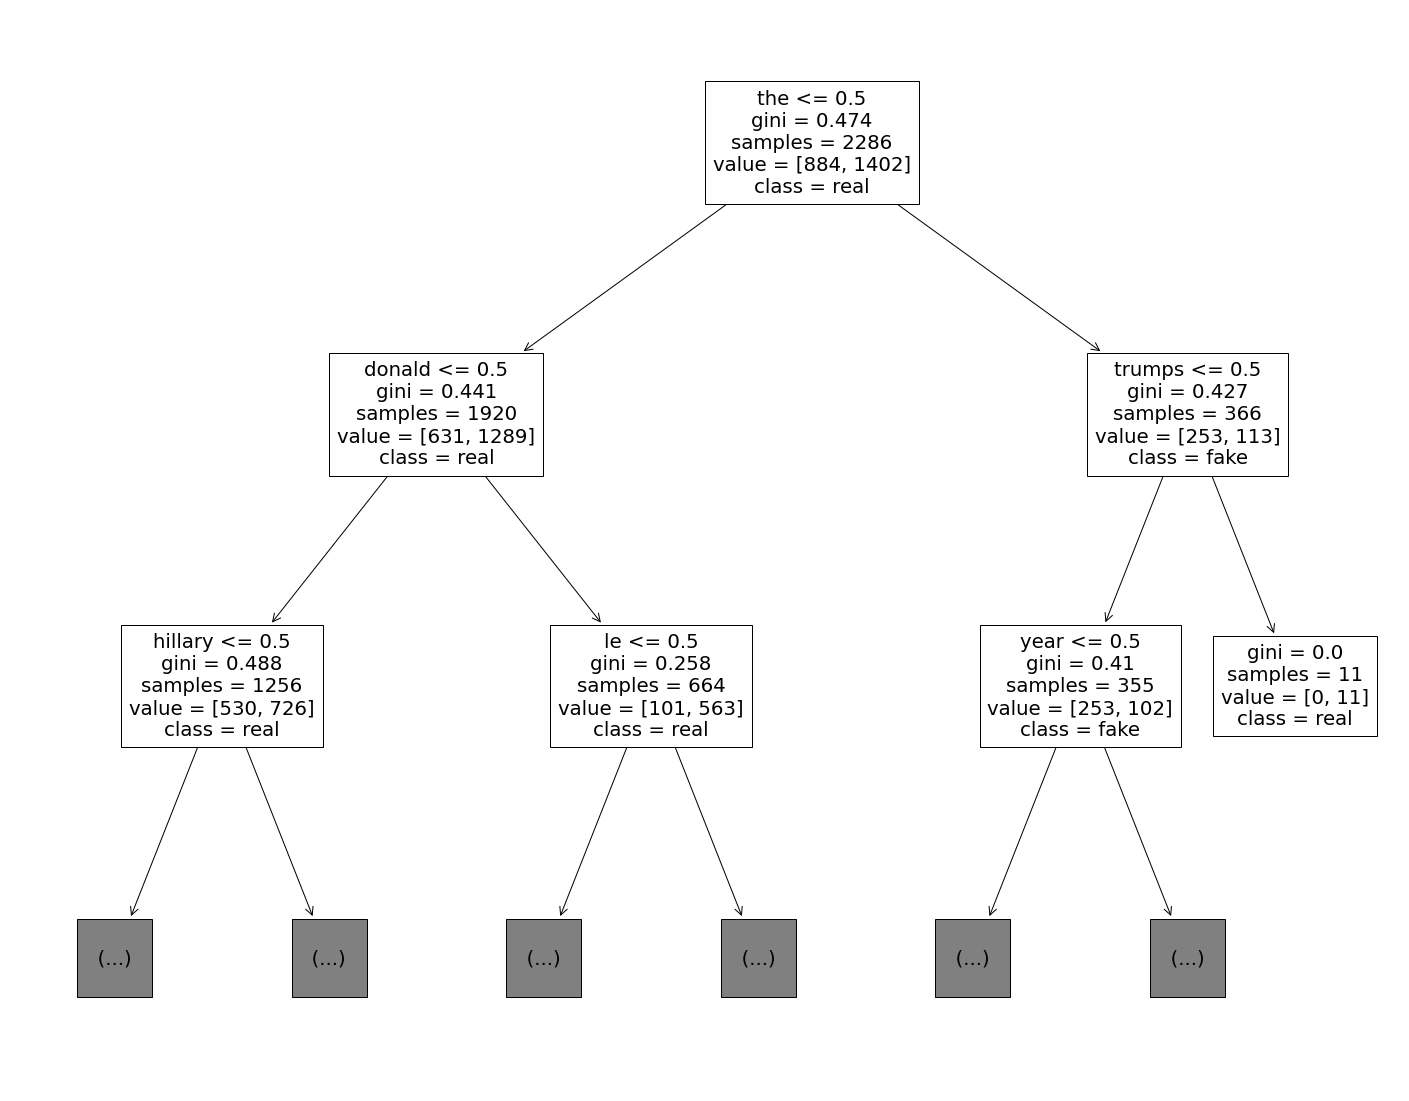

Information gain at split 'the' is 0.05259456627987577.
Information gain at split 'donald' is 0.05674422943179522.
Information gain at split 'hillary' is 0.032243782066679924.
Information gain at split 'in' is 0.0061281085753308595.
Information gain at split 'trump' is 0.029854365604092714.


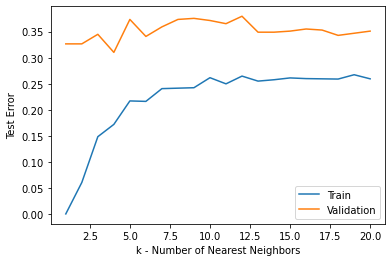

The best k is: 4, test accuracy is : 0.6469387755102041


In [32]:
def main():
    X_train, X_validation, X_test, Y_train, Y_validation, Y_test, feature_names, vectorizer = load_data()

    best_tree = select_tree_model(X_train, X_validation, Y_train, Y_validation)
    test_model(best_tree,X_test,Y_test,feature_names)
    
    for word in ['the','donald','hillary','in','trump']:
        compute_information_gain(vectorizer, X_train, Y_train, word)
        
    best_knn, test_accuracy = select_knn_model(X_train, X_validation, X_test, Y_train, Y_validation, Y_test)
    
if __name__ == "__main__":
    main()